In [1]:
import cv2
import numpy as np

img = cv2.imread('C://Users/shash/Downloads/my_image.jpeg')

# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

In [2]:
image = cv2.imread('C://Users/shash/Downloads/my_image.jpeg')

gray = get_grayscale(image)
thresh = thresholding(gray)
opening = opening(gray)
canny = canny(gray)

In [3]:
import cv2 
import pytesseract

#img = cv2.imread('C://Users/shash/Downloads/my_image1.jpeg')

# Adding custom options
custom_config = r'--oem 3 --psm 6'
pytesseract.image_to_string(img, config=custom_config)

'Single Field Analysis Eye: Lett\nName: JAYAKUMAR R DOB: 01-01-1981\nID: 413236\nCentral 24-2 Threshold Test\nFixation Monitor: Gaze/Blind Spot Stimulus: Il, White Pupil Diameter: 4.0 mm Date; 09-05-2018\nFixation Target: Central Background: 31.5 ASB Visual Acuity: 6/6 Time; 12:30 PM\nFixation Losses: 0/15 Strategy: SITA-Standard AX: -3.75DS DC X Age: 37\nFalse POS Errors: 0%\nFalse NEG Errors: 6%\nTest Duration: 05:28\nFovea:334B :: thaheheh | dedsheh\nBute a ,SSEREE PENSEEE\nee ae oe\nsn aalenas a |e\n2 © b a|x das 2 ae os a SRE\na oz nila na a HER Ec\nx ze ela a MEFbbcoos [ae gH”\n7 ata a “EEE: HEE\nsa osfe 7 ales\naasla27 oral o-s\nsavals23 220241 0-1-3 our\n8-43 8 “4 “6 “tt eee Within normal limits\nre re 1 20ke233-\n“2a ebs 387 Pr VFI 96%\n0 0 O}3 “5 -4 22 2/0 -3 2\n“4-2-6 -6 1 O)-8 3 MO = -3.73dB P< 1%\nPSD 2.0908 P< 5%\nTotal Deviation Pattern Deviation\nsole sole\ntel g Lele\nrs Be eal aed\nge cule ees : woe\ngenes TTT a\nnoo is PS . cof Bee\nLP gs + ales\nnot [ee 2 ¢5% oF Ara

In [ ]:
import pytesseract
from pytesseract import Output
import cv2
img = cv2.imread('C://Users/shash/Downloads/my_image.jpeg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
n_boxes = len(d['level'])
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
cv2.imshow('img', img)
cv2.waitKey(0)

In [7]:
import cv2
import pytesseract
from pytesseract import Output

#img = cv2.imread('C://Users/shash/Downloads/my_image1.jpeg')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


In [5]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)

32

In [7]:
import cv2
import pytesseract

img = cv2.imread('C://Users/shash/Downloads/my_image1.jpeg')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img) 
for b in boxes.splitlines():
    b = b.split(' ')
    img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 255, 0), 2)

cv2.imshow('img', img)
cv2.waitKey(0)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\shash\\AppData\\Local\\Temp\\tess_71qhp8_l_out.box'

In [16]:
# Improting Image class from PIL module 
from PIL import Image 
  
# Opens a image in RGB mode 
im = Image.open('C://Users/shash/Downloads/my_image1.jpeg') 
  
# Size of the image in pixels (size of orginal image) 
# (This is not mandatory) 
width, height = im.size 
print(width,height)
# Setting the points for cropped image 
left = 155
top = 65
right = 360
bottom = 270
  
# Cropped image of above dimension 
# (It will not change orginal image) 
im1 = im.crop((left, top, right, bottom)) 
  
# Shows the image in image viewer 
im1.show() 

1280 1154


In [57]:
from PIL import Image
img = Image.open("C://Users/shash/Downloads/my_image1.jpeg")
area = (400, 150, 800, 850)
cropped_img = img.crop(area)
cropped_img.show()

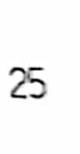

In [53]:
from PIL import ImageOps

border = (400, 150, 800, 850) # left, up, right, bottom
ImageOps.crop(img, border)

In [115]:
from PIL import Image
img = Image.open("C://Users/shash/Downloads/my_image1.jpeg")

for i in range(0,8):
    img_left_area = (300, 210+(i*100), 1000, 330+(i*100))
    img_left = img.crop(img_left_area)
    for j in range(0,10):
        img_left_area = (300+(j*100), 210+(i*100), 400+(j*100), 330+(i*100))
        img_left = img.crop(img_left_area)   
        #img_left.show()
        im1 = img_left.save(str(i)+str(j)+"geeks.jpg")
    
#img_right_area = (400, 0, 800, 600)
#img_right = img.crop(img_right_area)
#img_right.show()